# Open Amazon Books Json File

In [3]:
import pandas as pd
import json

with open('reviews_Books_5.json', 'r') as f:
    reviews = f.readlines()

In [4]:
#reviews[0:5]

## Eliminate /n

In [5]:
data = [json.loads(item.strip('\n')) for item in reviews]

In [6]:
#data[0:5]

## Convert to DataFrame

In [7]:
df = pd.DataFrame(data)

In [10]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,000100039X,"[0, 0]",5.0,Spiritually and mentally inspiring! A book tha...,"12 16, 2012",A10000012B7CGYKOMPQ4L,Adam,Wonderful!,1355616000
1,000100039X,"[0, 2]",5.0,This is one my must have books. It is a master...,"12 11, 2003",A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800
2,000100039X,"[0, 0]",5.0,This book provides a reflection that you can a...,"01 18, 2014",A1BM81XB4QHOA3,"Ahoro Blethends ""Seriously""",Must Read for Life Afficianados,1390003200
3,000100039X,"[0, 0]",5.0,I first read THE PROPHET in college back in th...,"09 27, 2011",A1MOSTXNIO5MPJ,Alan Krug,Timeless for every good and bad time in your l...,1317081600
4,000100039X,"[7, 9]",5.0,A timeless classic. It is a very demanding an...,"10 7, 2002",A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800


In [11]:
df.shape

(8898041, 9)

In [17]:
df.columns

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [8]:
df.to_csv('Amazon_Data_Frame.csv')

In [9]:
df_sub = df[:100]

# Avg Review Score

In [14]:
df.overall.mean()

4.2499322041784255

In [16]:
df.overall.median()

5.0

# Explore Columns

In [19]:
type(df.helpful[0])

list

In [23]:
type(df.helpful[0][0])

int

In [20]:
type(df.reviewTime[0])

str

In [21]:
type(df.unixReviewTime[0])

numpy.int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8898041 entries, 0 to 8898040
Data columns (total 9 columns):
asin              object
helpful           object
overall           float64
reviewText        object
reviewTime        object
reviewerID        object
reviewerName      object
summary           object
unixReviewTime    int64
dtypes: float64(1), int64(1), object(7)
memory usage: 611.0+ MB


In [26]:
df.describe()

,overall,unixReviewTime
count,8.898041e+06,8.898041e+06
mean,4.249932e+00,1.320212e+09
std,1.057733e+00,1.018516e+08
min,1.000000e+00,8.325504e+08
25%,4.000000e+00,1.296864e+09
50%,5.000000e+00,1.362182e+09
75%,5.000000e+00,1.385942e+09
max,5.000000e+00,1.406074e+09


# Graph Preliminary Data

In [27]:
 import matplotlib.pyplot as plt

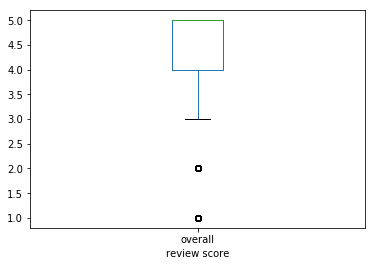

In [31]:
df.plot(y='overall', kind='box')
plt.xlabel('review score')
plt.show()

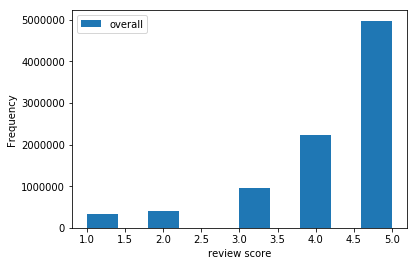

In [32]:
df.plot(y='overall', kind='hist')
plt.xlabel('review score')
plt.show()

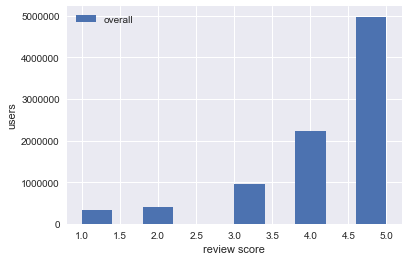

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

_ = df.plot(y='overall', kind='hist')
_ = plt.xlabel('review score')
_ = plt.ylabel('users')
plt.show()

# Explore 'Helpful'

## Compute 'Helpful' Percentage: 100 data points

In [15]:
import numpy as np
helpfulVotes = []
totalVotes = []

for item, row in df_sub.iterrows():
    helpfulVotes.append(row['helpful'][0])
    totalVotes.append(row['helpful'][1])
np_helpfulVotes = np.array(helpfulVotes)
np_totalVotes = np.array(totalVotes)
helpfulVotes_sum = np_helpfulVotes.sum()
totalVotes_sum = np_totalVotes.sum()
print(helpfulVotes_sum)
print(totalVotes_sum)

203
283


In [17]:
percentage_helpful = helpfulVotes_sum/totalVotes_sum
print(percentage_helpful)

0.7173144876325088


## Compute 'Helpful' Percentage: all data points

In [18]:
helpfulVotes = []
totalVotes = []

for item, row in df.iterrows():
    helpfulVotes.append(row['helpful'][0])
    totalVotes.append(row['helpful'][1])
np_helpfulVotes = np.array(helpfulVotes)
np_totalVotes = np.array(totalVotes)

helpfulVotes_sum = np_helpfulVotes.sum()
totalVotes_sum = np_totalVotes.sum()

print(helpfulVotes_sum)
print(totalVotes_sum)

percentage_helpful = helpfulVotes_sum/totalVotes_sum
print(percentage_helpful)

26763522
36039334
0.7426197720523914


## Compute 'Helpful' Percentage: 10000 data points

In [19]:
df_sub = df[:10000]

In [21]:
sub_helpfulVotes = []
sub_totalVotes = []

for item, row in df_sub.iterrows():
    sub_helpfulVotes.append(row['helpful'][0])
    sub_totalVotes.append(row['helpful'][1])
np_sub_helpfulVotes = np.array(sub_helpfulVotes)
np_sub_totalVotes = np.array(sub_totalVotes)

sub_helpfulVotes_sum = np_sub_helpfulVotes.sum()
sub_totalVotes_sum = np_sub_totalVotes.sum()

print(sub_helpfulVotes_sum)
print(sub_totalVotes_sum)

sub_percentage_helpful = sub_helpfulVotes_sum/sub_totalVotes_sum
print(sub_percentage_helpful)

42103
62072
0.6782929501224385


## Display'Helpful' Percentage Scatter Plot: 10000 data points

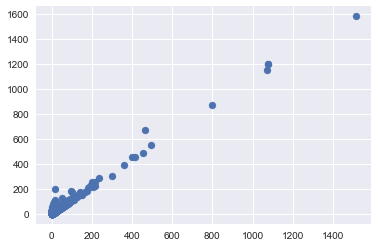

In [29]:
x = np_sub_helpfulVotes
y = np_sub_totalVotes
plt.scatter(x,y)
plt.show()

## Remove data points where no helpful vote has been cast

In [30]:
sub_helpfulVotes_reduced = []
sub_totalVotes_reduced = []

for item, row in df_sub.iterrows():
    if row['helpful'][1] != 0:
        sub_helpfulVotes_reduced.append(row['helpful'][0])
        sub_totalVotes_reduced.append(row['helpful'][1])
np_sub_helpfulVotes_reduced = np.array(sub_helpfulVotes_reduced)
np_sub_totalVotes_reduced = np.array(sub_totalVotes_reduced)

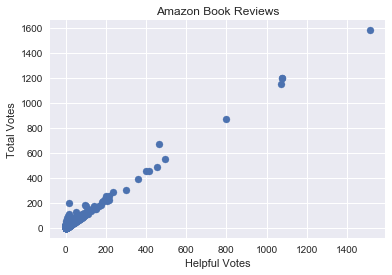

In [74]:
x = np_sub_helpfulVotes_reduced
y = np_sub_totalVotes_reduced
plt.xlabel('Helpful Votes')
plt.ylabel('Total Votes')
plt.title('Amazon Book Reviews')
plt.scatter(x,y)
plt.show()

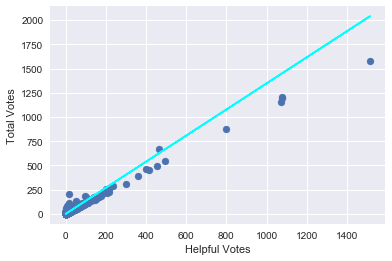

In [64]:
x = np_sub_helpfulVotes_reduced
y = np_sub_totalVotes_reduced
plt.xlabel('Helpful Votes')
plt.ylabel('Total Votes')
plt.scatter(x,y)
plt.plot(x,1/percentage_helpful*x, 'cyan')
plt.show()

## Plot helpful votes v unhelpful votes

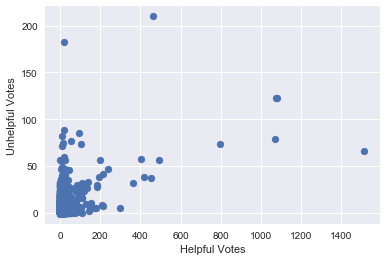

In [47]:
x = np_sub_helpfulVotes_reduced
y = np_sub_totalVotes_reduced - np_sub_helpfulVotes_reduced
plt.scatter(x,y)
plt.xlabel('Helpful Votes')
plt.ylabel('Unhelpful Votes')
plt.show()

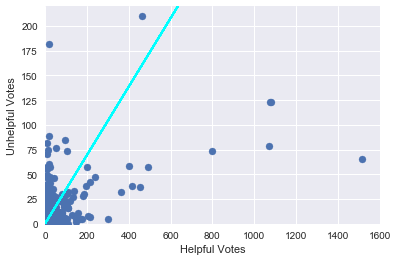

In [65]:
x = np_sub_helpfulVotes_reduced
y = np_sub_totalVotes_reduced - np_sub_helpfulVotes_reduced
plt.scatter(x,y)
plt.plot(x, (1-percentage_helpful)/percentage_helpful*x,'cyan')
plt.xlabel('Helpful Votes')
plt.ylabel('Unhelpful Votes')
plt.xlim(0,1600)
plt.ylim(0,220)
plt.show()

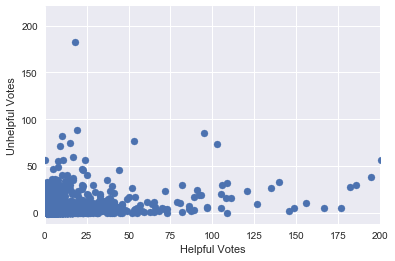

In [66]:
x = np_sub_helpfulVotes_reduced
y = np_sub_totalVotes_reduced - np_sub_helpfulVotes_reduced
plt.xlim(0,200)
plt.scatter(x,y)
plt.xlabel('Helpful Votes')
plt.ylabel('Unhelpful Votes')
plt.show()

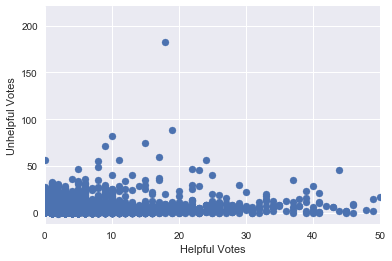

In [67]:
x = np_sub_helpfulVotes_reduced
y = np_sub_totalVotes_reduced - np_sub_helpfulVotes_reduced
plt.xlim(0,50)
plt.xlabel('Helpful Votes')
plt.ylabel('Unhelpful Votes')
plt.scatter(x,y)
plt.show()

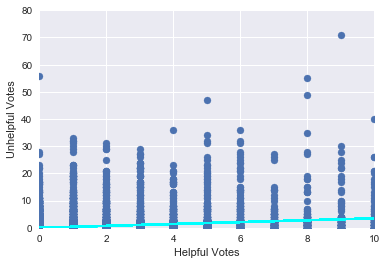

In [68]:
x = np_sub_helpfulVotes_reduced
y = np_sub_totalVotes_reduced - np_sub_helpfulVotes_reduced
plt.xlim(0,10)
plt.ylim(0,80)
plt.scatter(x,y)
plt.plot(x, (1-percentage_helpful)/percentage_helpful*x, 'cyan')
plt.xlabel('Helpful Votes')
plt.ylabel('Unhelpful Votes')
plt.show()

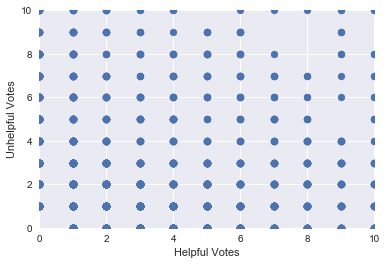

In [69]:
x = np_sub_helpfulVotes_reduced
y = np_sub_totalVotes_reduced - np_sub_helpfulVotes_reduced
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('Helpful Votes')
plt.ylabel('Unhelpful Votes')
plt.scatter(x,y)
plt.show()
